<a href="https://colab.research.google.com/github/matheushrq/engdados_python/blob/main/unidade_02_aula_02_sqlite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Realizando conexão com o banco de dados SQLite3

In [1]:
import sqlite3
conexao = sqlite3.connect('aluno.db') # cria o banco de dados aluno.db, caso não exista

In [2]:
cursor = conexao.cursor()

sql = 'create table aluno('\
      'idAluno integer primary key autoincrement,'\
      'nome varchar(100) not null,'\
      'sexo char)'

cursor.execute(sql) # cria a tabela no banco de dados

In [4]:
import numpy as np

sql = 'insert into aluno (nome, sexo) values (?, ?)'

cursor.execute(sql, ['Matheus', 'M']) # insere somente um registro

alunos = [['Alexandre', 'M'], ['Silvia', 'F'], ['João', 'M'], ['Maria', np.nan]]

# inserindo vários registros por estrutura de repetição
for aluno in alunos:
  cursor.execute(sql, aluno)

conexao.commit() # grava no banco de dados

In [6]:
sql = 'select * from aluno'

cursor.execute(sql)

alunos = cursor.fetchall() # retorna todos os registros
print(alunos)

for aluno in alunos:
  print(aluno)

[(1, 'Matheus', 'M'), (2, 'Matheus', 'M'), (3, 'Alexandre', 'M'), (4, 'Silvia', 'F'), (5, 'João', 'M'), (6, 'Maria', None)]
(1, 'Matheus', 'M')
(2, 'Matheus', 'M')
(3, 'Alexandre', 'M')
(4, 'Silvia', 'F')
(5, 'João', 'M')
(6, 'Maria', None)


In [7]:
sql = 'select * from aluno where idaluno >= ? and sexo = ?'

cursor.execute(sql, [2, 'M'])

alunos = cursor.fetchall() # retorna todos os registros

for id, nome, sexo in alunos:
  print(id, nome, sexo)

2 Matheus M
3 Alexandre M
5 João M


Utilizando o Pandas

In [8]:
import pandas as pd
import sqlite3
conexao = sqlite3.connect('aluno.db')
df = pd.read_sql_query('select * from aluno', conexao)
df

,idAluno,nome,sexo
0,1,Matheus,M
1,2,Matheus,M
2,3,Alexandre,M
3,4,Silvia,F
4,5,João,M
5,6,Maria,None


<Axes: xlabel='sexo'>

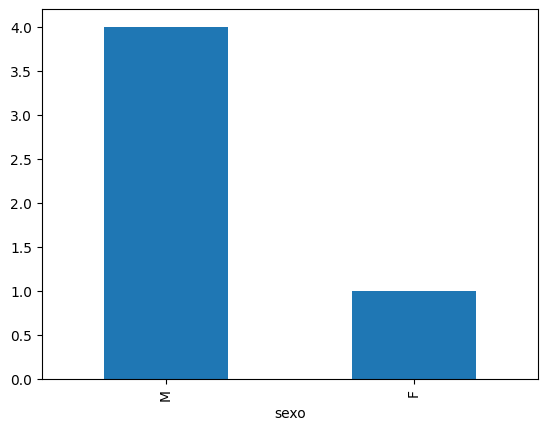

In [10]:
df['sexo'].value_counts()
df['sexo'].value_counts().plot(kind='bar')

In [11]:
import pandas as pd
df = pd.read_csv('https://github.com/alanjones2/dataviz/raw/master/londonweather.csv')
df

,Year,Month,Tmax,Tmin,Rain,Sun
0,1957,1,8.7,2.7,39.5,53.0
1,1957,2,9.0,2.9,69.8,64.9
2,1957,3,13.9,5.7,25.4,96.7
3,1957,4,14.2,5.2,5.7,169.6
4,1957,5,16.2,6.5,21.3,195.0
...,...,...,...,...,...,...
743,2018,12,10.7,5.2,60.6,40.3
744,2019,1,7.6,2.0,33.2,56.4
745,2019,2,12.4,3.3,34.2,120.2
746,2019,3,13.1,5.8,49.6,119.0


In [12]:
import sqlite3
conexao = sqlite3.connect('londonweather.db')
df.to_sql('londonweather', conexao, if_exists='replace') # {fail (falha), replace (sobrepor), append (acrescentar novos dados)}, default = fail

748

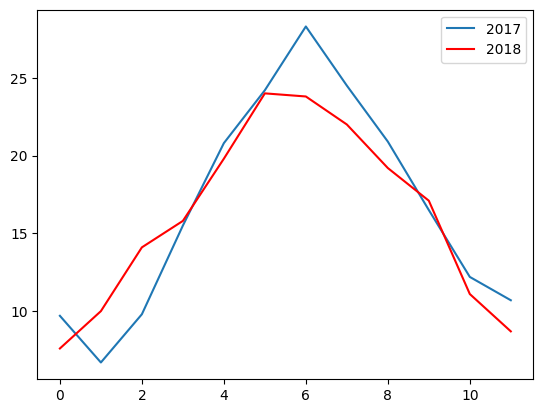

In [13]:
y2018 = pd.read_sql('select * from londonweather where year = 2018', conexao)
y2017 = pd.read_sql('select * from londonweather where year = 2017', conexao)
ax2018 = y2018.plot(y = 'Tmax')
ax = y2017.plot(y = 'Tmax', color = 'red', ax = ax2018)
ax.legend(['2017', '2018'])

<Axes: xlabel='Year'>

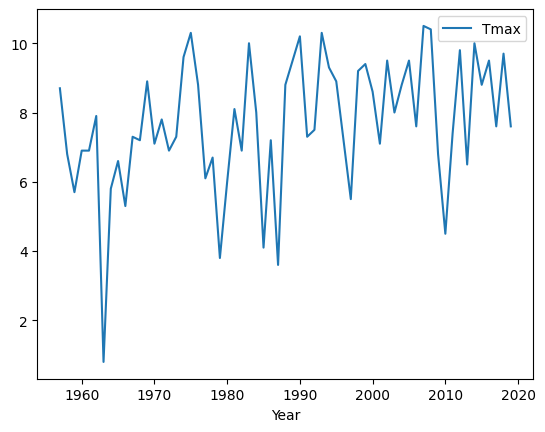

In [17]:
janeiro = pd.read_sql('select year, tmax from londonweather where month = 1', conexao)
# gráfico de linhas
janeiro.plot(y = 'Tmax', x = 'Year')

<Axes: xlabel='Year'>

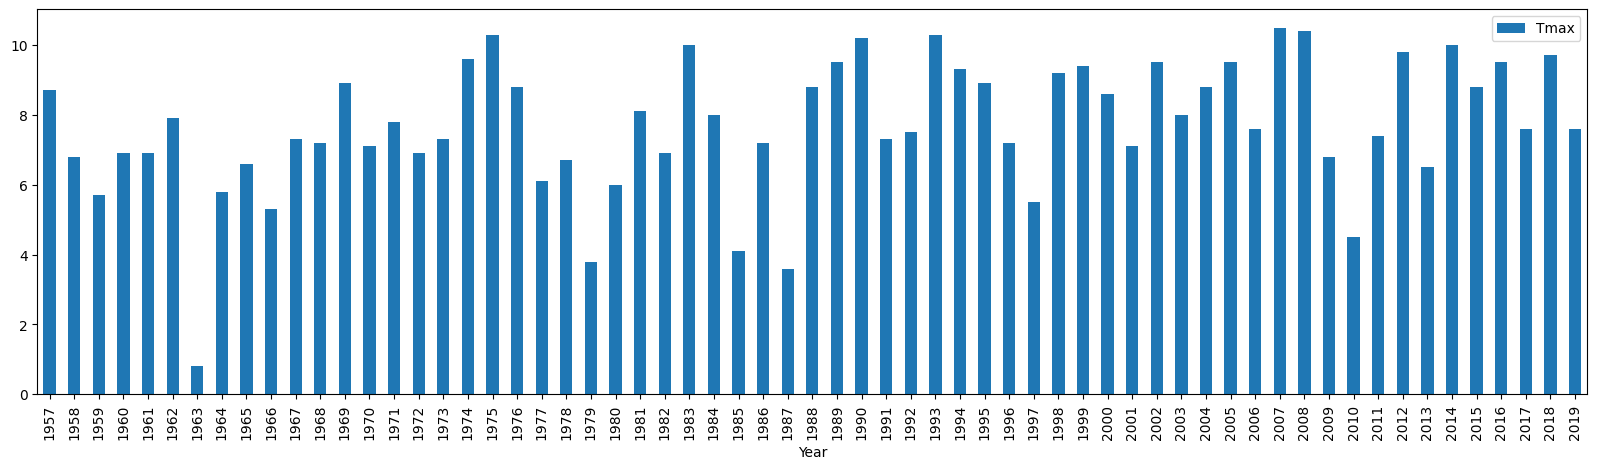

In [18]:
# gráfico de barras
janeiro.plot(y = 'Tmax', x = 'Year', kind = 'bar', figsize=(20,5))

<Axes: xlabel='Month'>

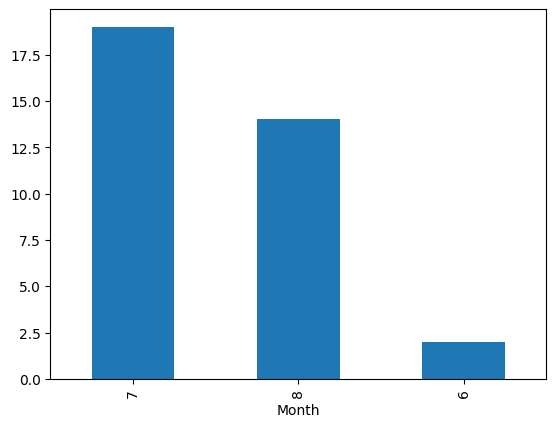

In [20]:
import pandas as pd
mesmaior = pd.read_sql('select month, tmax from londonweather where tmax > 24', conexao)
mesmaior['Month'].value_counts()
mesmaior['Month'].value_counts().plot(kind = 'bar')